# Handwritten Digit Classifier

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split,KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

digits_data=load_digits()

In [2]:
digits_data.keys()

dict_keys(['DESCR', 'target', 'images', 'target_names', 'data'])

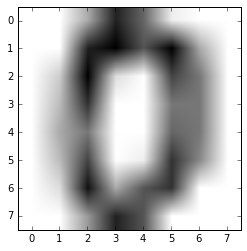

In [3]:
labels = pd.Series(digits_data['target'])
data = pd.DataFrame(digits_data['data'])

first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)
plt.imshow(np_image, cmap='gray_r')

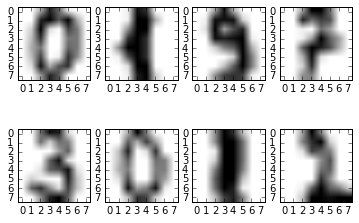

In [4]:
f, axarr = plt.subplots(2, 4)

axarr[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axarr[0, 1].imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
axarr[0, 2].imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
axarr[0, 3].imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')

axarr[1, 0].imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
axarr[1, 1].imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
axarr[1, 2].imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
axarr[1, 3].imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')

# K-Nearest Neighbors Model

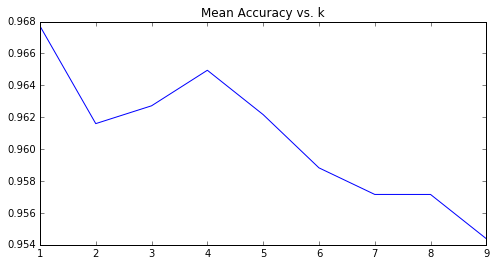

In [5]:
def train_knn(nneighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors = nneighbors)
    knn.fit(train_features, train_labels)
    return knn

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        
        model = train_knn(k, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

# Plot Results of Tuning K

k_values = list(range(1,10))
k_overall_accuracies = []

for k in k_values:
    k_accuracies = cross_validate(k)
    k_mean_accuracy = np.mean(k_accuracies)
    k_overall_accuracies.append(k_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. k")
plt.plot(k_values, k_overall_accuracies)

# Neural Network 1 Hidden Layer

In [6]:
def train_mlp(hls, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=hls)
    mlp.fit(train_features, train_labels)
    return mlp

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(hls):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        
        model = train_mlp(hls, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



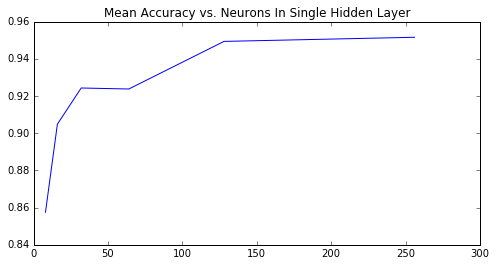

In [8]:
# Plot Results of Tuning Neurons in Single Hidden Layer

hls_values = [(8,),(16,),(32,),(64,),(128,),(256,)]
hls_overall_accuracies = []

for i in hls_values:
    hls_accuracies = cross_validate(i)
    hls_mean_accuracy = np.mean(hls_accuracies)
    hls_overall_accuracies.append(hls_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")
plt.plot([x[0] for x in hls_values], hls_overall_accuracies)

Adding more neurons to a single layer increased accuracy. K-NN did achieve ~96% accuracy while this model seems to level off at 95%.

# Neural Network 2 Hidden Layers 

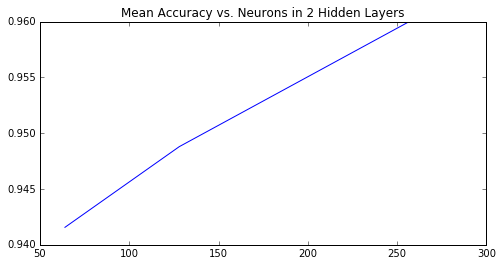

In [11]:
hls_values = [
    (64,64),
    (128, 128),
    (256, 256)
]
hls_overall_accuracies = []

for i in hls_values:
    hls_accuracies = cross_validate(i)
    hls_mean_accuracy = np.mean(hls_accuracies)
    hls_overall_accuracies.append(hls_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons in 2 Hidden Layers")
plt.plot([x[0] for x in hls_values], hls_overall_accuracies)

2 Hidden Layers improved our accuracy slightly. Without 4-fold cross validation we should be worried about overfitting

# Neural Network 3 Hidden Layers

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



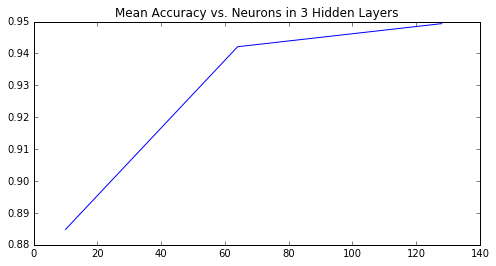

In [12]:
hls_values = [
    (10, 10, 10),
    (64, 64, 64),
    (128, 128, 128)
]
hls_overall_accuracies = []

for i in hls_values:
    hls_accuracies = cross_validate(i)
    hls_mean_accuracy = np.mean(hls_accuracies)
    hls_overall_accuracies.append(hls_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons in 3 Hidden Layers")
plt.plot([x[0] for x in hls_values], hls_overall_accuracies)

It seems the more complex a NN, the more accurate. This is of course up to a certain point of complexity in accordance with the variance/bias tradeoff.